In [ ]:
#data-loading efficiently
import pandas as pd
df=pd.read_csv('/content/mergecsv.csv',dtype={'Query': object},low_memory=False)
print("Data Shape:", df.shape)
df.head(10)

Data Shape: (68199, 2)


,Input,label
0,aabid,0
1,aabida,0
2,aachal,0
3,aadesh,0
4,aadil,0
5,aadish,0
6,aaditya,0
7,aaenab,0
8,aafreen,0
9,aafrin,0


In [ ]:
#printing columns from the csv file
print(df.columns)

Index(['Input', 'label'], dtype='object')


In [ ]:
#printing the count of the distinct values in the 2nd column- label
df['label'].value_counts()

label
1        34811
0        33383
Label        4
label        1
Name: count, dtype: int64

    Input label
0   aabid     0
1  aabida     0
2  aachal     0
3  aadesh     0
4   aadil     0
Index(['Input', 'label'], dtype='object')


<ipython-input-8-9b905f7ada7c>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set1')


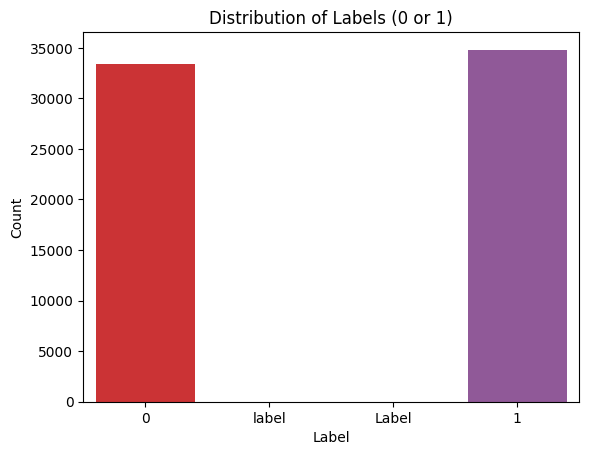

In [ ]:
#importing neccessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/mergecsv.csv')

# Check if the CSV file is loaded correctly
print(df.head())  # Print the first few rows of the DataFrame

# Check the column names in the DataFrame
print(df.columns)

# Plotting
sns.countplot(x='label', data=df, palette='Set1')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (0 or 1)')
plt.show()




In [ ]:
#printing the unique values from the column- label
df['label'].unique()

array(['0', 'label', 'Label', '1'], dtype=object)

In [ ]:
#label-encoding on the categorical data(not needed)
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['label']=label_encoder.fit_transform(df['label'])
df.head()

,Input,label
0,aabid,0
1,aabida,0
2,aachal,0
3,aadesh,0
4,aadil,0


In [ ]:
#printing the first column content
# column_name = "Input"
# print(data[column_name])
data_import = pd.read_csv('mergecsv.csv',     # Read first pandas DataFrame column
                           usecols = [1])
print(data_import)

      label
0         0
1         0
2         0
3         0
4         0
...     ...
68194     1
68195     1
68196     1
68197     1
68198     1

[68199 rows x 1 columns]


In [ ]:
#importing neccessary library
import nltk
nltk.download('punkt')

import pandas as pd
from nltk.tokenize import word_tokenize

def tokenize_queries(csv_file, column_name):
  """Tokenizes queries from a CSV file and returns tokenized data."""

  # Read the CSV file correctly handling potential path issues
  csv_path = csv_file  # Use provided path directly for clarity
  try:
    data = pd.read_csv(csv_path)
  except FileNotFoundError:
    print(f"Error: CSV file not found at path: {csv_path}")
    return []  # Return empty list if file not found

  # Tokenize queries
  tokenized_queries = []
  for query in data[column_name]:
    if isinstance(query, str):
      tokens = word_tokenize(query)
    else:
      tokens = []
    tokenized_queries.append(tokens)

  return tokenized_queries

# Actual usage (replace with correct file path and column name)
csv_file = "mergecsv.csv"  # Ensure correct path
column_name = "Input"  # Replace with the actual column name

tokenized_data = tokenize_queries(csv_file, column_name)

# Check results (without excessive printing for large datasets)
print(tokenized_data[:50])  # Print first 5 tokenized queries



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['aabid'], ['aabida'], ['aachal'], ['aadesh'], ['aadil'], ['aadish'], ['aaditya'], ['aaenab'], ['aafreen'], ['aafrin'], ['aaftaab'], ['aaftab'], ['aagand'], ['aahim'], ['aajad'], ['aajiv'], ['aakanksha'], ['aakar'], ['aakas'], ['aakash'], ['aakib'], ['aalam'], ['aalina'], ['aaliya'], ['aamil'], ['aamin'], ['aamina'], ['aamir'], ['aamod'], ['aamosh'], ['aamrin'], ['aanad'], ['aanamika'], ['aanand'], ['aanchal'], ['aanik'], ['aanil'], ['aansi'], ['aansu'], ['aanya'], ['aaradhana'], ['aarati'], ['aarav'], ['aardhna'], ['aarif'], ['aarifa'], ['aarifun'], ['aarju'], ['aarti'], ['aarushi']]


In [ ]:
#importing neccessary library
import pandas as pd
import numpy as np  # For numerical symbol handling

# Load the dataset (limit rows for demonstration)
data = pd.read_csv("mergecsv.csv", nrows=100)  # Read only 100 rows for example

# Specify column name with usernames and SQL injection content
input_column = "Input"

# Function to separate text and symbols from a string, handling non-strings
def separate_text_symbols(string):
  """Separates text and symbols within a string, handling potential non-string values."""
  if isinstance(string, str):
    text_tokens = []
    symbol_tokens = []
    current_token = ""
    for char in string:
      if char.isalpha():
        current_token += char
      else:
        if current_token:  # Add accumulated text token if any
          text_tokens.append(current_token)
          current_token = ""
      symbol_tokens.append(char)
    if current_token:  # Add the last text token if any
      text_tokens.append(current_token)
    return text_tokens, symbol_tokens
  else:
    # Handle non-strings gracefully (e.g., return empty lists)
    return [], []

# Apply separation to each item in the column
text_data = []
symbol_data = []
for i in range(len(data)):
  text_tokens, symbol_tokens = separate_text_symbols(data[input_column].iloc[i])
  text_data.append(text_tokens)
  symbol_data.append(symbol_tokens)

# Find the maximum symbol list length (assuming some symbols are present)
max_symbol_len = max(len(sublist) for sublist in symbol_data if sublist)  # Handles empty symbol cases
# Create an empty NumPy array with a fixed length for symbols (adjust padding as needed)
symbol_data = np.zeros((len(data), max_symbol_len), dtype=object)

# Fill the symbol array with actual symbol tokens
for i in range(len(data)):
  symbol_data[i, :len(symbol_data[i])] = symbol_data[i]

# Print initial examples (concise for large datasets)
print("Initial text data (first 10):\n", text_data[:10])
print("\nInitial symbol data (first 10):\n", symbol_data[:10])

# Print data in chunks to avoid overwhelming the browser (adjust chunk size as needed)
chunksize = 100
for i in range(0, len(text_data), chunksize):
  print("\nText data (", i, "to", min(i + chunksize, len(text_data)), "):\n", text_data[i:i + chunksize])
  print("\nSymbol data (", i, "to", min(i + chunksize, len(symbol_data)), "):\n", symbol_data[i:i + chunksize])


Initial text data (first 10):
 [['aabid'], ['aabida'], ['aachal'], ['aadesh'], ['aadil'], ['aadish'], ['aaditya'], ['aaenab'], ['aafreen'], ['aafrin']]

Initial symbol data (first 10):
 [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Text data ( 0 to 100 ):
 [['aabid'], ['aabida'], ['aachal'], ['aadesh'], ['aadil'], ['aadish'], ['aaditya'], ['aaenab'], ['aafreen'], ['aafrin'], ['aaftaab'], ['aaftab'], ['aagand'], ['aahim'], ['aajad'], ['aajiv'], ['aakanksha'], ['aakar'], ['aakas'], ['aakash'], ['aakib'], ['aalam'], ['aalina'], ['aaliya'], ['aamil'], ['aamin'], ['aamina'], ['aamir'], ['aamod'], ['aamosh'], ['aamrin'], ['aanad'], ['aanamika'], ['aanand'], ['aanchal'], ['aanik'], ['aanil'], ['aansi'], ['aansu'], ['aanya'], ['aaradhana'], ['aarati'], ['aarav'], ['aardhna'], ['aarif'], ['aarifa'], ['aarifun'],

In [ ]:
#word embedding
#importing neccessary library
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential  # Imported for future reference
import numpy as np
from gensim.models import Word2Vec

# Read data from CSV file
data = pd.read_csv("mergecsv.csv")

# Extract text data from "Input" column
text_data = data["Input"].tolist()

# Maximum sequence length (adjust based on your data)
max_len = 100

# Text Tokenization with Error Handling (same from previous code)
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words based on vocabulary size
def preprocess_text(text):
  """
  This function preprocesses text data by converting it to lowercase
  and removing empty strings. You can modify it to handle other cases.

  Args:
      text: The text data to preprocess.

  Returns:
      str: The preprocessed text.
  """
  if isinstance(text, str):
    return text.lower()  # Convert to lowercase
  else:
    return ""  # Handle non-strings gracefully

text_data = [preprocess_text(text) for text in text_data]

try:
  tokenizer.fit_on_texts(text_data)
except AttributeError as e:
  print("AttributeError encountered during tokenization. Consider data cleaning or more robust preprocessing.")
  print(e)

# Word2Vec Model Training (assuming enough data for training)
embedding_dim = 100
word2vec_model = Word2Vec(sentences=text_data, vector_size=embedding_dim, min_count=1)

# Print Word2Vec Model Summary (Optional)
print("Word2Vec Model Summary:")
print(word2vec_model)  # Print model details

# Create Embedding Matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
  try:
    embedding_vector = word2vec_model.wv[word]  # Access using indexing for newer versions
  except KeyError:
    embedding_vector = np.zeros(embedding_dim)  # Example: Assign zero vector for OOV words
  embedding_matrix[i] = embedding_vector
# Print Embedding Matrix Shape 
print("\nEmbedding Matrix Shape:", embedding_matrix.shape)

Word2Vec Model Summary:
Word2Vec<vocab=108, vector_size=100, alpha=0.025>

Embedding Matrix Shape: (42849, 100)


In [ ]:
#feature extraction
#importing neccessary library
import pandas as pd

# Assuming "Input" column contains the text data
data = pd.read_csv("mergecsv.csv")
text_data = data["Input"].tolist()
text_data = [item for item in text_data if not isinstance(item, float)]

#defining function
def has_keyword(text, keywords):
  """
  This function checks if any of the given keywords are present in the text.

  Args:
      text: The text to check.
      keywords: A list of keywords to search for.

  Returns:
      bool: True if any keyword is found, False otherwise.
  """
  for keyword in keywords:
    if keyword.lower() in text.lower():
      return True
  return False

#defining function
def query_length(text):
  """
  This function calculates the length of the query string.

  Args:
      text: The query string.

  Returns:
      int: The length of the query string.
  """
  return len(text)

#defining function
def has_special_chars(text, special_chars):
  """
  This function checks if any of the given special characters are present in the text.

  Args:
      text: The text to check.
      special_chars: A list of special characters to search for.

  Returns:
      bool: True if any special character is found, False otherwise.
  """
  for char in special_chars:
    if char in text:
      return True
  return False

#defining sql keywords and special characters
sql_keywords = ["select", "from", "where", "update", "delete", "insert", "drop", "union"]
special_chars = ["'", '"', ';', '--', '#']

features = []
for text in text_data:
  # Extract features for each query
  feature_dict = {
      "has_sql_keyword": has_keyword(text, sql_keywords),
      "query_length": query_length(text),
      "has_special_char": has_special_chars(text, special_chars)
  }
  features.append(feature_dict)

# Print Extracted Features (Sample 5)
print("Extracted Features (Sample 5):")
for i in range(5):
  print(features[i])


Extracted Features (Sample 5):
{'has_sql_keyword': False, 'query_length': 5, 'has_special_char': False}
{'has_sql_keyword': False, 'query_length': 6, 'has_special_char': False}
{'has_sql_keyword': False, 'query_length': 6, 'has_special_char': False}
{'has_sql_keyword': False, 'query_length': 6, 'has_special_char': False}
{'has_sql_keyword': False, 'query_length': 5, 'has_special_char': False}


In [ ]:
df_with_features = pd.DataFrame(features)
df_with_features["original_text"] = text_data

# Print the first 5 rows of the DataFrame (optional)
print(df_with_features.head())


   has_sql_keyword  query_length  has_special_char original_text
0            False             5             False         aabid
1            False             6             False        aabida
2            False             6             False        aachal
3            False             6             False        aadesh
4            False             5             False         aadil


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 542, 1, 64)        256       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 271, 1, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 269, 1, 128)       24704     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 134, 1, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 132, 1, 256)       98560     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 66, 1, 256)       

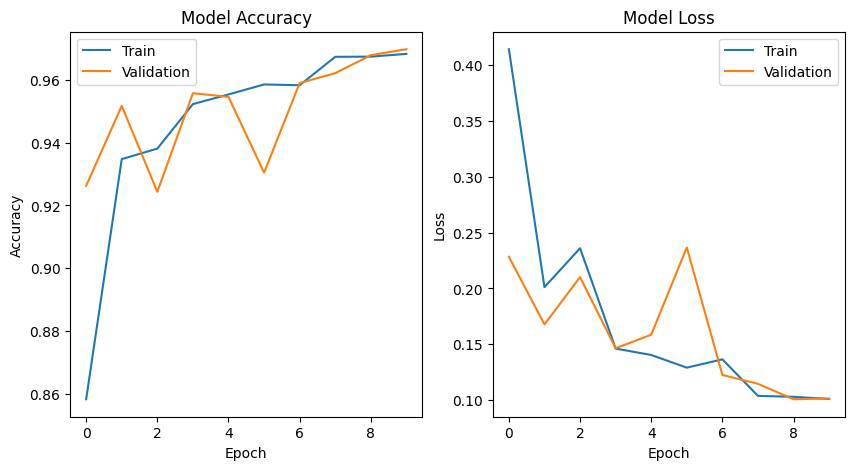

427/427 [==============================] - 15s 36ms/step - loss: 0.1015 - accuracy: 0.9697
Test Loss: 0.10149720311164856
Test Accuracy: 0.9697191715240479
427/427 [==============================] - 15s 36ms/step


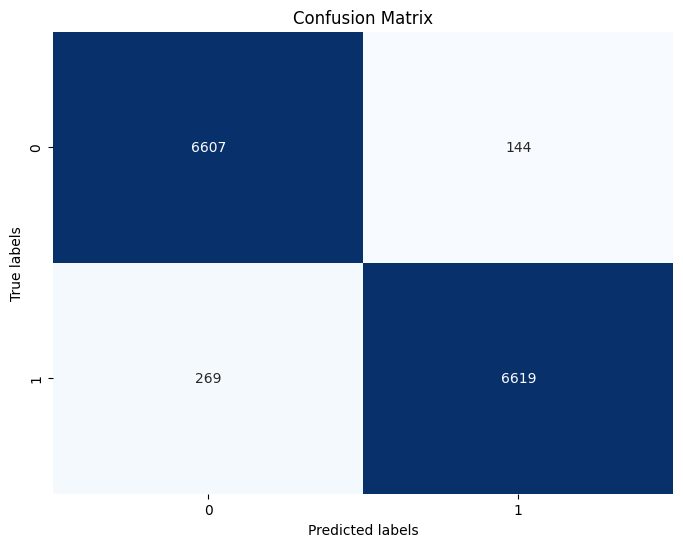

In [ ]:
#2D CNN with 3 convolutional,3 maxpooling layer, 1 flatten and 3 fully connected layer
#importing neccessary library
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 1: Data Preprocessing
data = pd.read_csv('mergecsv.csv')

# Handle corner cases in the 'label' column
def convert_to_int(label):
    try:
        return int(label)
    except ValueError:
        return -1  # Handle unexpected values by assigning a default label

data['Input'] = data['Input'].apply(lambda x: str(x).lower().strip())
data['label'] = data['label'].apply(convert_to_int)
data = data[data['label'] != -1]  # Remove rows with unexpected values
X = data['Input']
y = data['label']

# Step 2: Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_indices = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_indices)

# Step 3: Reshaping for 2D CNN
max_length = X_pad.shape[1]
vocab_size = len(tokenizer.word_index) + 1
X_pad = X_pad.reshape(X_pad.shape[0], max_length, 1, 1)  # Reshape for Conv2D input

# Step 4: Building the 2D CNN Model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 1), activation='relu', input_shape=(max_length, 1, 1)))
model.add(MaxPooling2D((2, 1)))  
model.add(Conv2D(filters=128, kernel_size=(3, 1), activation='relu'))
model.add(MaxPooling2D((2, 1))) 
model.add(Conv2D(filters=256, kernel_size=(3, 1), activation='relu'))
model.add(MaxPooling2D((2, 1))) 
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))

# Step 5: Compiling and Training the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)
model.summary()

# Train the model and get history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
import matplotlib.pyplot as plt
# Plot training history
def plot_history(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

import seaborn as sns
from sklearn.metrics import confusion_matrix
# Obtain predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()